<a href="https://colab.research.google.com/github/saikrishnakolluri/Tic_TAc_Toe_AI/blob/main/Histogram_Modification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from image_enhancement import image_enhancement
import cv2 as cv2
import numpy as np
from google.colab.patches import cv2_imshow
#!pip install image_enhancement


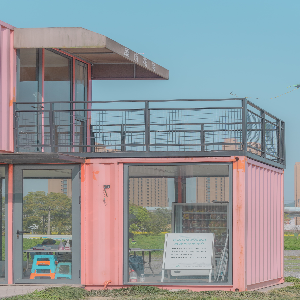

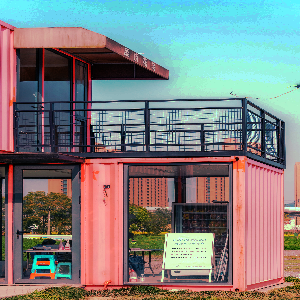

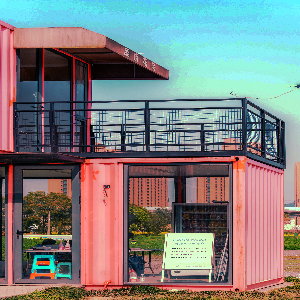

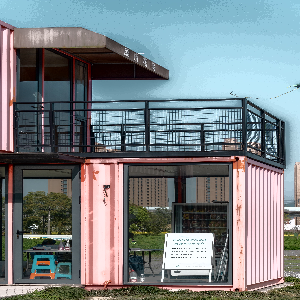

-1

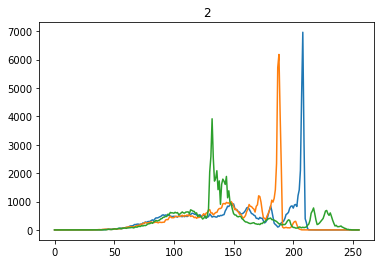

In [99]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

z=0
res=331
res1=331
def hist(image):
    global z
    global res
    H=np.zeros(shape=(256,1))
    s=image.shape
    for i in range(s[0]):
        for j in range(s[1]):
            k=image[i,j]
            H[k,0]+=1
    #print(res)        
    #plt.subplot(res)
    #res+=1               
    #plt.plot(H)
    #plt.title(z)
    #z+=1
        
    return H

def normalHE(img):    
    h=np.zeros(shape=(256,1))
    H=hist(img)
    s=img.shape
    x=H.reshape(1,256)
    y=np.array([])
    y=np.append(y,x[0,0])
    for i in range(255):
        k=x[0,i+1]+y[i]
        y=np.append(y,k)
    y=np.round((y/(s[0]*s[1]))*255)

    for i in range(s[0]):
        for j in range(s[1]):
            k=img[i,j]
            img[i,j]=y[k] 
    return img    


def run_histogram_equalization(image_path):
    #rgb_img = cv2.imread(image_path)
    
    ycrcb_img = cv2.cvtColor(image_path, cv2.COLOR_BGR2YCrCb)
    ycrcb_img[:, :, 0] = cv2.equalizeHist(ycrcb_img[:, :, 0])


    equalized_img = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)

    return equalized_img

def modified(img):
    global z,res1
    h=np.zeros(shape=(256,1))
    H=hist(img)
    s=img.shape
    for i in range(256):
        if H[i]==0:
            continue
        else:
            H[i]=0
            break
    for i in range(255,-1,-1):
        if H[i]==0:
            continue
        else:
            H[i]=min(H[i],H[i-1])
            break
    x=H.reshape(1,256)

    plt.plot(H)
    plt.title(z)
    z+=1
    y=np.array([])
    y=np.append(y,x[0,0])
    for i in range(255):
        k=x[0,i+1]+y[i]
        y=np.append(y,k)
    y=np.round((y/(s[0]*s[1]))*255)

    for i in range(s[0]):
        for j in range(s[1]):
            k=img[i,j]
            img[i,j]=y[k] 
    return img  

def BBHE(img):
    pass

          
def histogram_equalize(img):
    #img= cv2.imread(img1)
    b, g, r = cv2.split(img)
    blue=normalHE(b)
    green=normalHE(g)
    red=normalHE(r)
    return cv2.merge((blue, green, red))

def modified_Histogram(img):
    global res
    b, g, r = cv2.split(img)
    blue=modified(b)
    green=modified(g)
    red=modified(r)
    hist(blue)
    hist(red)
    hist(green)
    return cv2.merge((blue, green, red))



image=cv2.imread("9.jpg")


image=cv2.resize(image, (300,300))
cv2_imshow(image)
x=histogram_equalize(image)
cv2_imshow(x)
#t=ne.histogram_equalization(image)
#cv2.imshow("no",t)
y=modified_Histogram(image)
cv2_imshow(y)
z=run_histogram_equalization(image)
cv2_imshow(z)

cv2.waitKey(0)

 


In [100]:
ie=image_enhancement.IE(image)

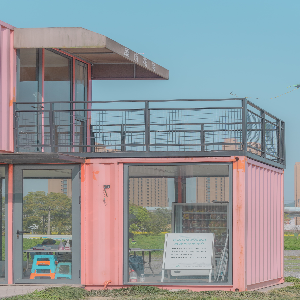

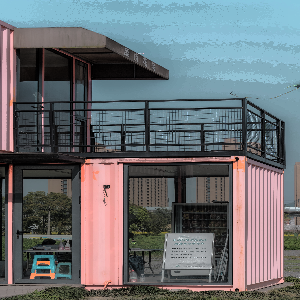

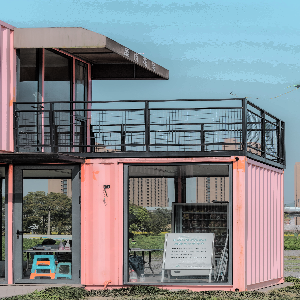

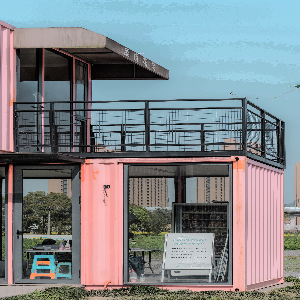

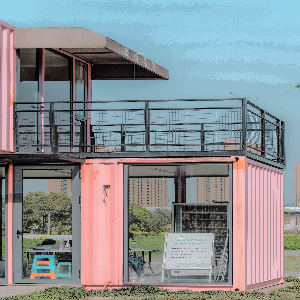

In [101]:

GHE= ie.GHE()
BBHE=ie.BBHE()
DSIHE=ie.DSIHE()
RMSHE=ie.RMSHE()
cv2_imshow(image)
cv2_imshow(GHE)
cv2_imshow(BBHE)
cv2_imshow(DSIHE)
cv2_imshow(RMSHE)

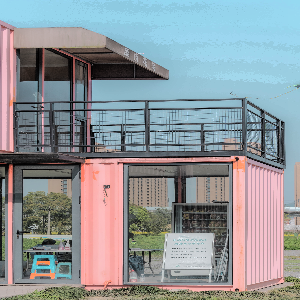

In [102]:
cv2_imshow(ie.BPHEME())

In [24]:
help(ie.BPHEME)

Help on method BPHEME in module image_enhancement.image_enhancement:

BPHEME() method of image_enhancement.image_enhancement.IE instance
    # Wang, Chao, and Zhongfu Ye.
    # Brightness preserving histogram equalization with maximum entropy: a variational perspective.
    # IEEE Transactions on Consumer Electronics 51, no. 4 (2005): 1326-1334.
    # Brightness Preserving Histogram Equalization with Maximum Entropy (BPHEME)

